In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
spscientist_students_performance_in_exams_path = kagglehub.dataset_download('spscientist/students-performance-in-exams')

print('Data source import complete.')


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [3]:
!pip install flask

In [4]:
from flask import Flask, jsonify
import pandas as pd
import os
import threading

app = Flask(__name__)

# Locate CSV file
csv_file = None
for root, _, files in os.walk(spscientist_students_performance_in_exams_path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)

@app.route("/students/scores", methods=["GET"])
def get_student_scores():
    """
    Serves student score data from Kaggle dataset.
    """
    df = pd.read_csv(csv_file)

    results = []

    for idx, row in df.head(5).iterrows():
        avg_score = (
            row["math score"] +
            row["reading score"] +
            row["writing score"]
        ) / 3

        results.append({
            "student": f"Student {idx + 1}",
            "average_score": round(avg_score, 2)
        })

    return jsonify(results)


def run_api():
    app.run(port=5001, use_reloader=False)


threading.Thread(target=run_api).start()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:127.0.0.1 - - [14/Jan/2026 11:48:44] "GET /students/scores HTTP/1.1" 200 -


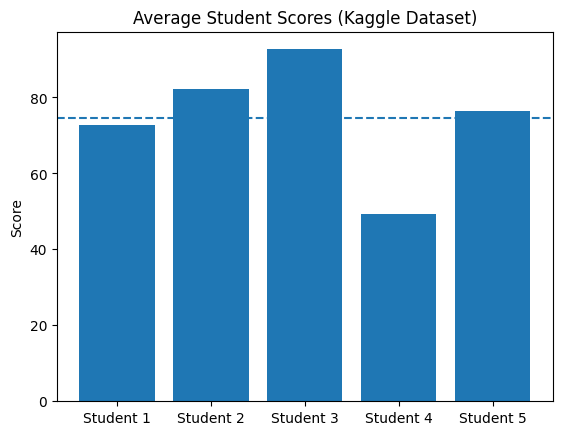

In [5]:
import requests
import matplotlib.pyplot as plt

API_URL = "http://127.0.0.1:5001/students/scores"

response = requests.get(API_URL)
response.raise_for_status()

data = response.json()

names = []
scores = []

for item in data:
    names.append(item["student"])
    scores.append(item["average_score"])

average_score = sum(scores) / len(scores)

plt.bar(names, scores)
plt.axhline(average_score, linestyle="--")
plt.title("Average Student Scores (Kaggle Dataset)")
plt.ylabel("Score")

plt.show()
